# Part 1

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv("../data/data1.csv")
df1

,Unnamed: 0.1,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


In [3]:
ad_sales = df1.iloc[:, 2:]
ad_sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Question 1

### a. scatter plaot between Tv and Sales

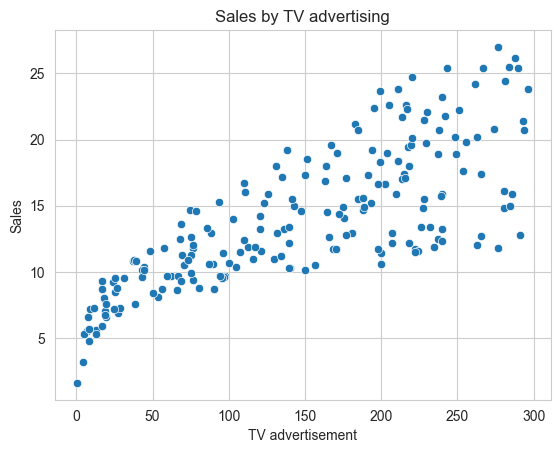

In [4]:
sns.scatterplot(x=ad_sales["TV"], y=ad_sales["Sales"])
plt.xlabel("TV advertisement")
plt.ylabel("Sales")
plt.title("Sales by TV advertising")
plt.show()

### b. pairplots and heatmap

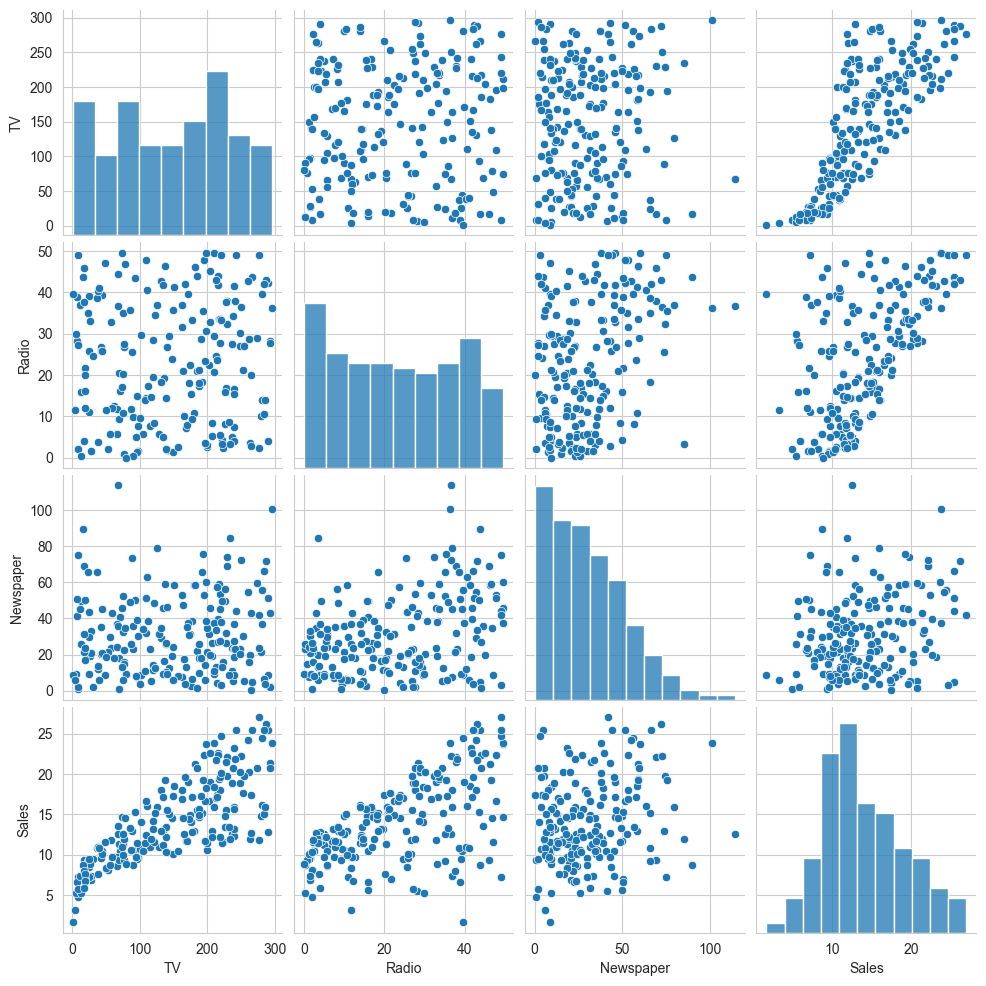

In [5]:
sns.pairplot(ad_sales)
plt.show()

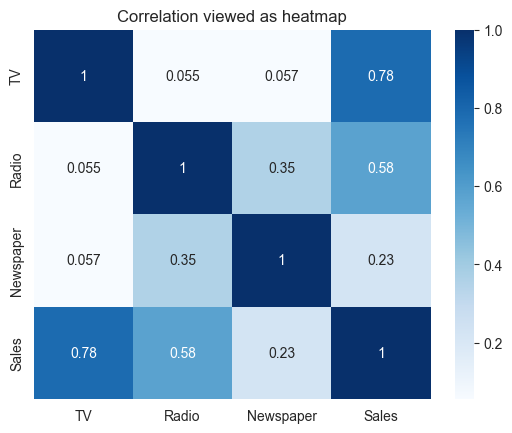

In [6]:
correlation = ad_sales.corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title("Correlation viewed as heatmap")
plt.show()

### Question 2

In [7]:
col = ad_sales.columns

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ad_sales = scaler.fit_transform(ad_sales)
ad_sales = pd.DataFrame(ad_sales, columns=col)
ad_sales

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ad_sales.iloc[:, 1], ad_sales.iloc[:, -1], random_state=69, test_size=0.25)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [11]:
regressor.fit(np.array(X_train).reshape(-1, 1), y_train)

LinearRegression()

### Question 3

In [12]:
pred = regressor.predict(np.array(X_test).reshape(-1, 1))

In [34]:
pred

array([ 0.66187141,  0.21948093, -0.75103462,  0.59328374,  0.11317004,
        0.4355321 , -0.42524318, -0.77846969, -0.68244695,  0.87106381,
       -0.2331977 , -0.29835599, -0.43210195, -0.53498345, -0.25034462,
       -0.75789338, -0.56927729,  0.80590552,  0.11317004,  0.16118141,
       -0.68930571, -0.14060434, -0.19890386,  0.62071881,  0.53155484,
        0.31893306,  0.38409135,  0.78189984,  0.4149558 ,  0.17489895,
        0.18175771,  0.29492737,  0.67558895, -0.63443558,  0.67215957,
       -0.17146879, -0.65501188,  0.49383162,  0.5178373 ,  0.6447245 ,
        0.76132354,  0.05829991, -0.63100619, -0.81619291,  0.60014251,
       -0.43210195, -0.54184222,  0.60014251, -0.80247537,  0.12002881])

In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
mse

0.6046986817978016

### Question 4

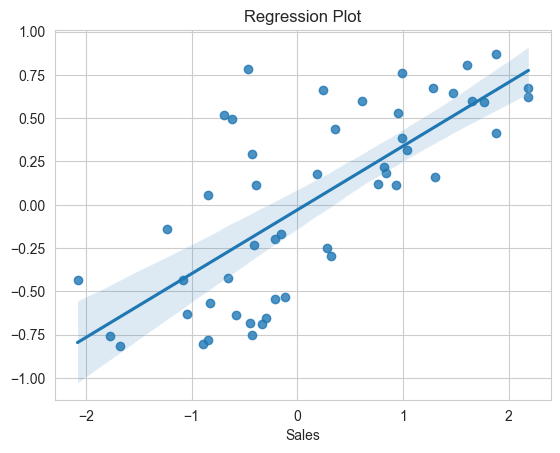

In [14]:
sns.regplot(x=y_test, y=pred)
plt.title("Regression Plot")
plt.show()

### Question 5

In [15]:
from statsmodels.api import OLS

In [16]:
ols_reg = OLS(y_train, X_train)
ols_reg.fit()

In [17]:
# y_pred = ols_reg.predict(X_test)

# Part 2

In [18]:
diabetic = pd.read_csv("../data/data2.csv", names=["A", "B", "C", "D", "E", "F", "G", "H", "I"])
diabetic

,A,B,C,D,E,F,G,H,I
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Question 1

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetic.iloc[:, :-1], diabetic.iloc[:, -1],
                                                    random_state=69, test_size=0.2)

In [20]:
X_train

,A,B,C,D,E,F,G,H
173,1,79,60,42,48,43.5,0.678,23
707,2,127,46,21,335,34.4,0.176,22
124,0,113,76,0,0,33.3,0.278,23
68,1,95,66,13,38,19.6,0.334,25
327,10,179,70,0,0,35.1,0.200,37
...,...,...,...,...,...,...,...,...
439,6,107,88,0,0,36.8,0.727,31
602,1,124,74,36,0,27.8,0.100,30
619,0,119,0,0,0,32.4,0.141,24
203,2,99,70,16,44,20.4,0.235,27


## Question 2

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
X_train

array([[-0.86342788, -1.29281995, -0.45977824, ...,  1.45901617,
         0.59307974, -0.87659918],
       [-0.55927141,  0.20885465, -1.17602575, ...,  0.31612801,
        -0.90135534, -0.96216864],
       [-1.16758434, -0.22913378,  0.35879034, ...,  0.1779767 ,
        -0.59770518, -0.87659918],
       ...,
       [-1.16758434, -0.04142445, -3.52941042, ...,  0.0649438 ,
        -1.00554902, -0.79102972],
       [-0.55927141, -0.6671222 ,  0.05182712, ..., -1.44216147,
        -0.72571456, -0.53432134],
       [ 0.96151091,  0.92840706, -0.15281502, ...,  0.35380564,
         0.71215823,  0.74922054]])

In [24]:
np.mean(X_train[0])

-0.04319131468253562

In [25]:
np.std(X_train[0])

0.9834208770298379

### Question 3

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
pred_knn = knn.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_knn)
print("Accuracy: ", acc)

Accuracy:  0.7922077922077922


### Question 4

In [30]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test, pred_knn)
c_mat

array([[89, 10],
       [22, 33]])

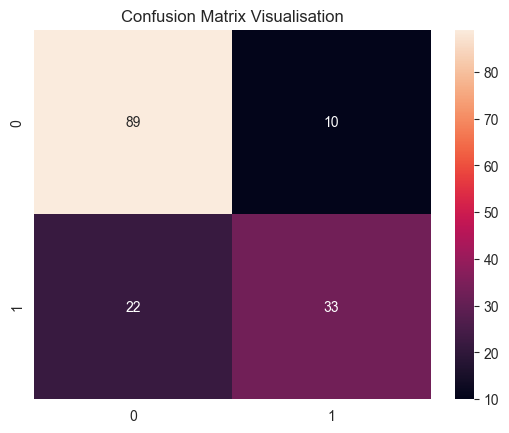

In [31]:
sns.heatmap(c_mat, annot=True)
plt.title("Confusion Matrix Visualisation")
plt.show()

### Question 5

In [32]:
k_err = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k_err.append(1-accuracy)
k_err

[0.2987012987012987,
 0.2857142857142857,
 0.24675324675324672,
 0.22077922077922074,
 0.20779220779220775,
 0.24025974025974028,
 0.23376623376623373,
 0.2532467532467533,
 0.23376623376623373,
 0.2272727272727273,
 0.2142857142857143,
 0.2012987012987013,
 0.18831168831168832,
 0.20779220779220775,
 0.20779220779220775,
 0.2272727272727273,
 0.2142857142857143,
 0.2272727272727273,
 0.2142857142857143,
 0.24025974025974028]

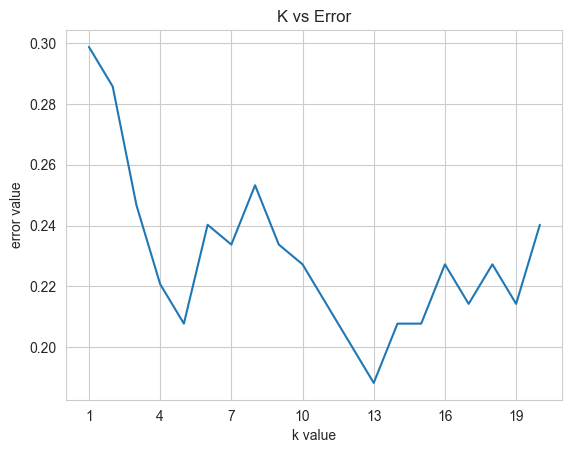

In [33]:
plt.plot(range(1, 21), k_err, )
plt.xlabel("k value")
plt.ylabel("error value")
plt.title("K vs Error")
plt.xticks(range(1, 21, 3))
plt.show()